# Lecture 2: Probability Models & Random Number Generators (RNGs)

In [1]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large',
      'lines.linewidth': 2}

plt.rcParams.update(params)
%matplotlib inline

## First Package for Statistics: scipy.stats
- Random number generator (RNG)
    - rvs(): generate random variates
    - pdf(): probability density function for continuous distributions
    - pmf(): probability mass function for discrete distributions
    - cdf(): cumulative density function
    - ppf(): percent point function (inverse of cdf - percentiles)
- References
    - https://docs.scipy.org/doc/scipy/reference/stats.html
    - https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

In [2]:
import scipy.stats

### Discrete Random Variables

#### Bernoulli Distribution

In [3]:
sample1 = scipy.stats.bernoulli(0.5).rvs(30)
sample1

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1])

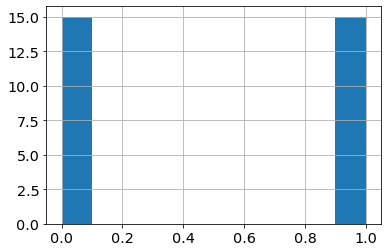

In [4]:
plt.hist(sample1)
plt.grid(True)

#### Binomial Distribution

In [5]:
sample2 = scipy.stats.binom(n = 10, p = 0.5).rvs(3000)
sample2

array([5, 3, 6, ..., 5, 5, 6])

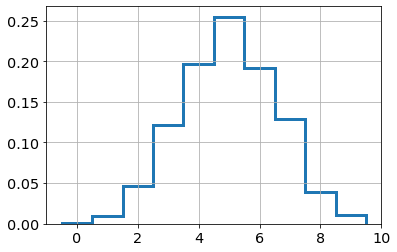

In [6]:
import matplotlib.pyplot as plt

plt.hist(sample2, density = True, histtype = "step", linewidth = 3, align = "left")
plt.grid(True)

### Continuous Random Variables

#### Uniform Distribution

In [7]:
sample3 = scipy.stats.uniform(0, 1).rvs(1000)

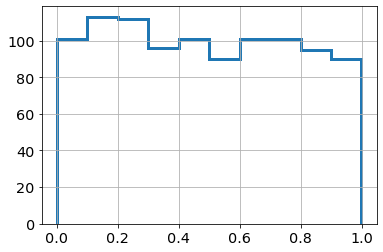

In [8]:
plt.hist(sample3, bins = 10, histtype = 'step', linewidth = 3)
plt.grid(True)

#### Normal Distribution

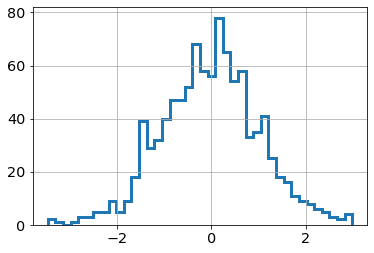

In [9]:
sample4 = scipy.stats.norm().rvs(1000) # standard normal distribution
plt.hist(sample4, bins = 40, histtype = 'step', linewidth = 3)
plt.grid(True)

In [10]:
print(sample4.mean(), sample4.std(), scipy.stats.skew(sample4), scipy.stats.kurtosis(sample4))

-0.026341295079124357 1.0283365024395927 -0.006829815436926049 0.1465125217187353


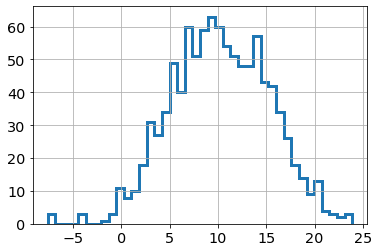

In [11]:
sample4 = scipy.stats.norm(loc = 10, scale = 5).rvs(1000) # normal distribution
plt.hist(sample4, bins = 40, histtype = 'step', linewidth = 3)
plt.grid(True)

#### $\chi^2$ Distribution

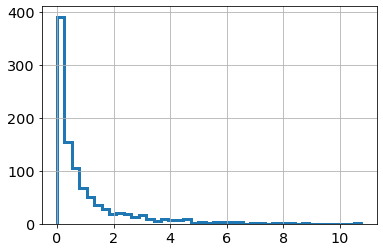

In [12]:
X = scipy.stats.norm().rvs(1000)
sample5 = X ** 2
plt.hist(sample5, bins = 41, histtype = 'step', linewidth = 3)
plt.grid(True)

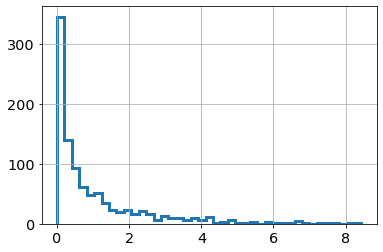

In [13]:
sample6 = scipy.stats.chi2(df = 1).rvs(1000)
plt.hist(sample6, bins = 41, histtype = 'step', linewidth = 3)
plt.grid(True)

#### Student's t Distribution

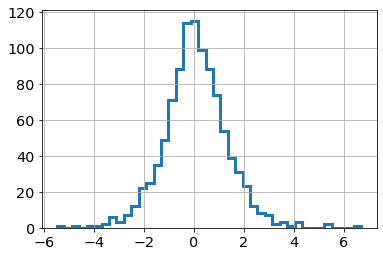

In [14]:
sample7 = scipy.stats.t(df = 5).rvs(1000)
plt.hist(sample7, bins = 41, histtype = 'step', linewidth = 3)
plt.grid(True)

#### F Distribution

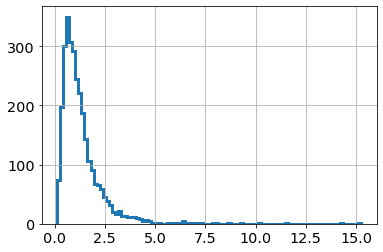

In [15]:
sample8 = scipy.stats.f(dfn = 10, dfd = 10).rvs(3000)
plt.hist(sample8, bins = 100, histtype = 'step', linewidth = 3)
plt.grid(True)

### Probability Density Function (PDF)

#### Normal Distribution

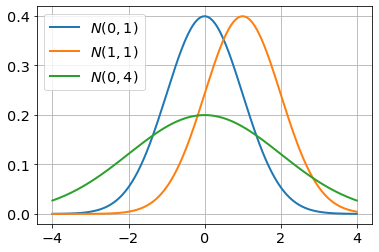

In [16]:
import numpy as np

x = np.linspace(-4, 4, 201)
y1 = scipy.stats.norm.pdf(x)
y2 = scipy.stats.norm.pdf(x, loc = 1)
y3 = scipy.stats.norm.pdf(x, scale = 2)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(["$N(0, 1)$", "$N(1, 1)$", "$N(0, 4)$"])
plt.grid(True)

#### Student's t Distribution

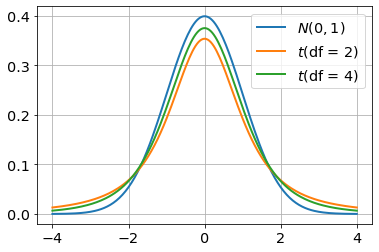

In [17]:
x = np.linspace(-4, 4, 201)
y0 = scipy.stats.norm.pdf(x)
y1 = scipy.stats.t.pdf(x, df = 2)
y2 = scipy.stats.t.pdf(x, df = 4)

plt.figure()
plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["$N(0, 1)$", "$t$(df = 2)", "$t$(df = 4)"])
plt.grid(True)

### Cumulative Distribution Function (CDF) 

In [18]:
scipy.stats.norm().cdf(x = 0)

0.5

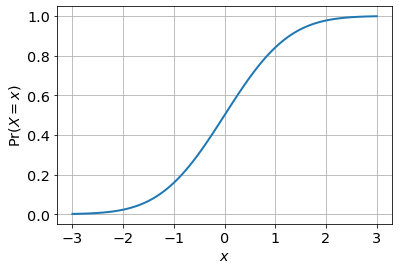

In [19]:
import numpy as np

x = np.linspace(-3, 3, 100)
y = scipy.stats.norm().cdf(x)
plt.plot(x, y)
plt.xlabel("$x$")
plt.ylabel("Pr($X = x$)")
plt.grid(True)

### Percentiles / Quantiles

In [20]:
scipy.stats.norm(loc = 70, scale = 10).ppf(0.9)

82.815515655446

In [21]:
scipy.stats.norm().ppf(0.95) # Pr(X < x) = 0.95 -> x = 1.6448536269514722 ~ 1.64

1.6448536269514722

In [22]:
scipy.stats.norm().ppf(0.975) # Pr(X < x) = 0.975 -> x = 1.959963984540054 ~ 1.96

1.959963984540054

### Covariance and Correlation

In [23]:
import numpy as np

In [24]:
X = scipy.stats.norm().rvs(50)
Y = 0.5 * X + 0.5 * scipy.stats.norm().rvs(50)

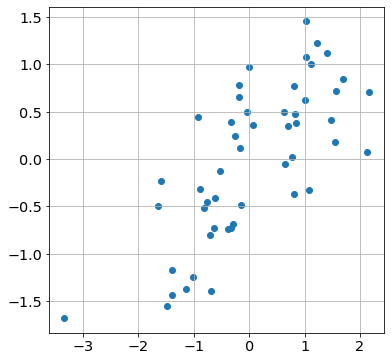

In [25]:
plt.figure(figsize = (6, 6))
plt.scatter(X, Y)
plt.grid(True)

In [26]:
print(np.var(X), np.var(Y)) # population variance

1.2565135680431843 0.6378157848634083


In [27]:
print(np.var(X, ddof = 1), np.var(Y, ddof = 1)) # sample variance with correction of degree of free

1.2821567020848819 0.65083243353409


In [28]:
np.cov(X, Y) # sample covariance

array([[1.2821567 , 0.66713873],
       [0.66713873, 0.65083243]])

In [29]:
np.corrcoef(X, Y)

array([[1.        , 0.73031632],
       [0.73031632, 1.        ]])